# Задание 8

## 1. Wiki philosophy (0.5 баллов)
Существует шуточный «закон Философии» для статей Википедии: если переходить по
первой нормальной ссылке в статье, то рано или поздно мы придем на статью о философии.
Ваша задача заключается в том, чтобы проверить этот закон.
Для этого нужно написать программу, которая получает на вход ссылку на статью Википедии, а потом циклически переходит по первой нормальной ссылке и повторяет эту операцию
(до тех пор, пока не будет достигнута статья о философии, или ссылки не зациклятся). Нормальной ссылкой будем называть ссылку, которая находится в основном содержании статьи,
не в инфобоксах и не в служебных блоках, написана синим цветом (красный соответствует
несуществующей статье), не курсивом, не являтся сноской и не находится в скобках.

<b>Результат</b> должен представлять из себя несколько статистик (проверьте не менее 100 стр., <i>больше - лучше</i>):
* Описание алгоритма, как вы решали, стр. по философии или нет?
* Количество начальных ссылок vs Количество конечных тем страниц (0 - стр. не по философии, 1 - по философии).
* Гистограмма длин путей.
* Соотношений успешных и неуспешных запросов.
* Что еще можно тут придумать? :)

<b>Обратите внимание</b>, что для проверки нормальности не обязательно разбирать таблицы стилей и
проверять цвет и т.п., достаточно сделать, чтобы программа работала для текущей верстки
википедии (например, можно использовать атрибут class у тегов).
Для удобства проверки сделайте, чтобы последовательность переходов выводилась на
экран.

<b>Внимание.</b> Чтобы не создавать большую нагрузку на сервер Википедии, сделайте так,
чтобы ваша программа делала не более 2-х запросов в секунду. Для этого воспользуйтесь
функцией sleep из модуля time.

<b>PS</b> Лучше выполнять не в ipython notebook, а прислать отчет в pdf и код.

# Алгоритм

- Для каждой страницы будем хранить посещенные из неё ссылки(` self.visited `), во избежания зацикливания
- В словаре `steps` храним частоту встречаемости для конертной длины перехода(потом строим гистограмму по нему)
- html страницу парсим с помощью библиотеки `Beatifulsoup`
- Проверяем полученную ссылку на нормальность с помощью функции `check_on_bad_link`
- Проверяем статью на филосовствость `/wiki/Philosophy`

In [1]:
from urllib import request
from bs4 import BeautifulSoup
import time
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from tqdm import tnrange


class PhilosophyCrawler(object):

    def __init__(self):
        self.visited = []
        self.bad_links = ['_Greek', '_language', '_Language', 'Latin']
        self.prefix = "http://en.wikipedia.org"

    def _find_first_href(self, content_text):
        par_ = content_text.find_all('p')
        for p in par_:
            links = p.find_all('a')
            for l in links:
                url = l.get('href')
                if self.check_on_bad_link(url):
                    return l
        return False

    def trace_(self, articleURL: str) -> str:
        try:
            soup = BeautifulSoup(request.urlopen(articleURL).read())  # without lxml
        except:
            return False
        content_text = soup.find(id='mw-content-text')
        if soup.find('Wikipedia does not have an article with this exact name'):
            print('gui')

        return self._find_first_href(content_text) or False

    def check_on_bad_link(self, url: str):
        if url is None or url[0:6] != '/wiki/' \
                or ':' in url or url in self.visited:
            return False

        for l in self.bad_links:
            if url.endswith(l):
                return False
        return True

    def test_start(self, test_numer: int):
        self.steps = defaultdict(int)

        for i in tnrange(test_numer):
#         for i in range(test_numer):
            page = '/wiki/Special:Random'
            step, goal, self.visited = 0, False, []

            while not goal:
                url = self.trace_(self.prefix + page)

                if url:
                    print("hop: {}, url : {}".format(step, url.get('title')))
                    page = url.get('href')

                    if page == '/wiki/Philosophy':
                        goal = True
                        step += 1
                        self.steps[step] += 1
                    self.visited.append(page)

                    step += 1
                    time.sleep(0.5)

        print(f"All {test_numer} DONE!")

    def _draw_hist(self):
        plt.bar(self.steps.keys(), self.steps.values(), color='g')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:52: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


hop: 0, url : Venture capitalist
hop: 1, url : Private equity
hop: 2, url : Investment fund
hop: 3, url : Investment
hop: 4, url : Finance
hop: 5, url : Capital (finance)
hop: 6, url : Entrepreneur
hop: 7, url : Small business
hop: 8, url : Corporation
hop: 9, url : Company
hop: 10, url : Legal personality
hop: 11, url : Person
hop: 12, url : Reason
hop: 13, url : Consciousness
hop: 14, url : Sentience
hop: 15, url : Feeling
hop: 16, url : Touch
hop: 17, url : Sensory nervous system
hop: 18, url : Nervous system
hop: 19, url : Complex system
hop: 20, url : Collective intelligence
hop: 21, url : Emergence
hop: 22, url : Collective action
hop: 23, url : Goal
hop: 24, url : Idea
hop: 25, url : Philosophy
hop: 0, url : Ferry
hop: 1, url : Merchant vessel
hop: 2, url : Watercraft
hop: 3, url : Vehicles
hop: 4, url : Machine
hop: 5, url : Mechanical structure
hop: 6, url : Civil engineering
hop: 7, url : Regulation and licensure in engineering
hop: 8, url : Licensure
hop: 9, url : License
ho

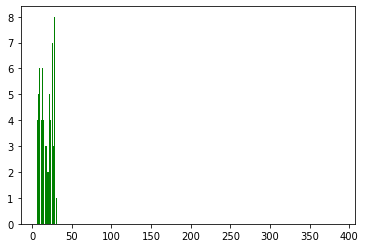

In [2]:
pw = PhilosophyCrawler()
pw.test_start(100)
pw._draw_hist()

## 2. Books lib (0.5 баллов)
Напишите сайт-библиотеку для книг. Он должен удовлетворять следующему функционалу:
* Иметь одну главную страницу со списком авторов и ниже их произведений.
* Можно кликнуть на автора и получить список его произведений на отдельной стр.
* Можно кликнуть на книгу и получить текст книги на отдельной стр.
* Оформление и улучшение функционала приветствуются. Но можно обойтись заголовками и ссылками.

<b>Особенности реализации</b>:
* Список книг и авторов заранее не задан и должен быть создан автоматически. (<i>как - понятно из следующего описания</i>)
* Все книги хранятся по каталогам, которые имеют имя автора.
* Каждая книга имеет название, которое и будет показано в ссылке.
* Архив с книгами в папке с заданием (books.zip).
* Плюсом будет, если вы "замайните" книги, вместо использования случайного списка файлов (+0.2 балла).
* Использовать flask и bootstrap стили.

<b>PS</b> Лучше выполнять не в ipython notebook, а прислать отчет в pdf и код.